In [1]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations like IQR calculation
import matplotlib.pyplot as plt  # For plotting histograms and boxplots
import seaborn as sns  # For visualizations

from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For scaling

## a. Computing Mean, Median, and Standard Deviation 

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Compute mean, median, and standard deviation
stats = df.describe().T
stats['median'] = df.median()

print(stats[['mean', 'median', 'std']])


                       mean  median       std
sepal length (cm)  5.843333    5.80  0.828066
sepal width (cm)   3.057333    3.00  0.435866
petal length (cm)  3.758000    4.35  1.765298
petal width (cm)   1.199333    1.30  0.762238


## b. Creating Histograms and Boxplots for Feature Distributions

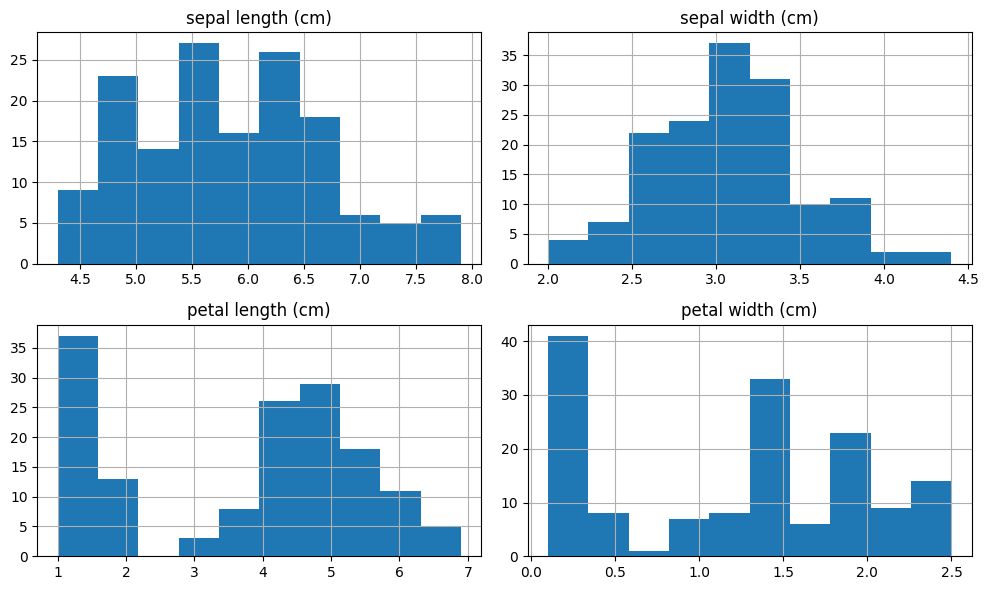

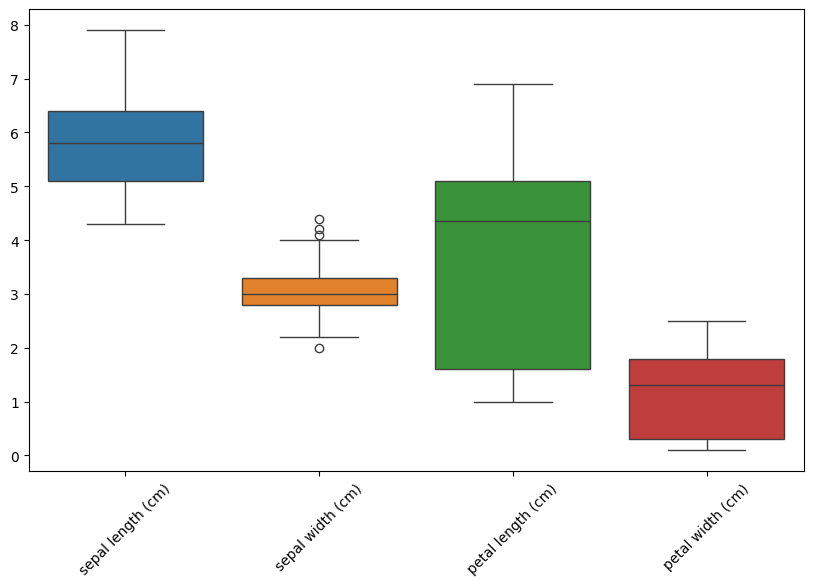

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

## c. Calculating Correlation Matrix for the Features

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


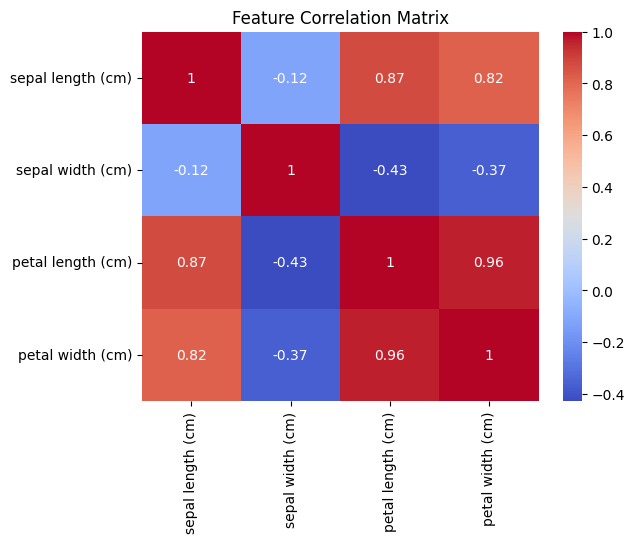

In [4]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Heatmap for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

## d. Interpreting Most Correlated Features
Interpretation can be written based on the correlation matrix output:

Features with correlation coefficients close to 1 or -1 are strongly correlated.

## Conditional Probability

In [5]:
# Total probabilities
P_A_and_B = 30
P_B = (30 + 50) / 200
P_A = (30 + 20) / 200

# Conditional probabilities
P_A_given_B = P_A_and_B / (30 + 50)
P_B_given_A = P_A_and_B / (30 + 20)

print(f"P(A|B) = {P_A_given_B:.2f}")
print(f"P(B|A) = {P_B_given_A:.2f}")

P(A|B) = 0.38
P(B|A) = 0.60


## Bayes' Theorem

In [6]:
# Given probabilities
P_Spam = 0.2
P_NotSpam = 0.8
P_Keyword_given_Spam = 0.7
P_Keyword_given_NotSpam = 0.1

# Calculate P(Keyword)
P_Keyword = (P_Keyword_given_Spam * P_Spam) + (P_Keyword_given_NotSpam * P_NotSpam)

# Bayes' Theorem
P_Spam_given_Keyword = (P_Keyword_given_Spam * P_Spam) / P_Keyword

print(f"P(Spam|Keyword) = {P_Spam_given_Keyword:.2f}")

P(Spam|Keyword) = 0.64


## Outlier Detecting, Removing, and Feature Scaling

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("Q1:\n", Q1)
print("Q3:\n", Q3)
print("IQR:\n", IQR)

Q1:
 sepal length (cm)    5.1
sepal width (cm)     2.8
petal length (cm)    1.6
petal width (cm)     0.3
Name: 0.25, dtype: float64
Q3:
 sepal length (cm)    6.4
sepal width (cm)     3.3
petal length (cm)    5.1
petal width (cm)     1.8
Name: 0.75, dtype: float64
IQR:
 sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
dtype: float64


In [8]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

df_no_outliers = remove_outliers(df)
print("Data before outlier removal:", df.shape)
print("Data after outlier removal:", df_no_outliers.shape)

Data before outlier removal: (150, 4)
Data after outlier removal: (146, 4)


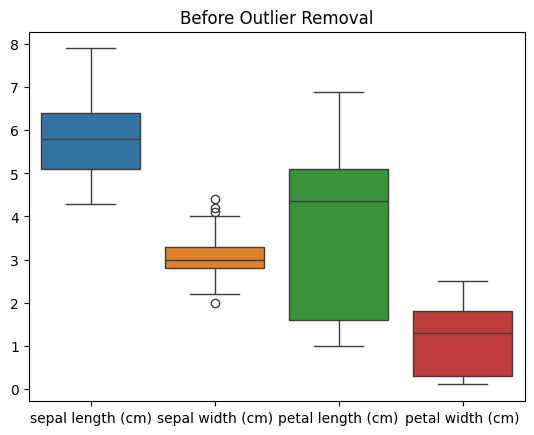

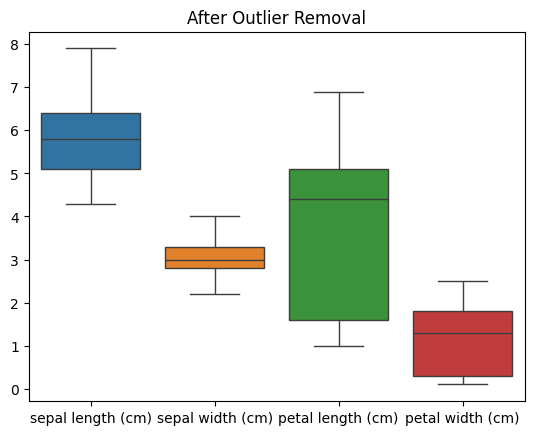

In [9]:
# Before outlier removal
sns.boxplot(data=df)
plt.title("Before Outlier Removal")
plt.show()

# After outlier removal
sns.boxplot(data=df_no_outliers)
plt.title("After Outlier Removal")
plt.show()

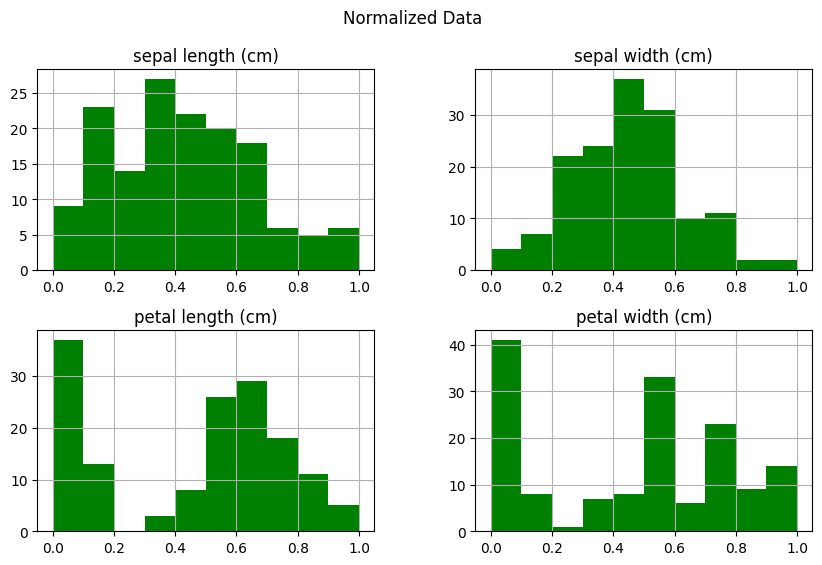

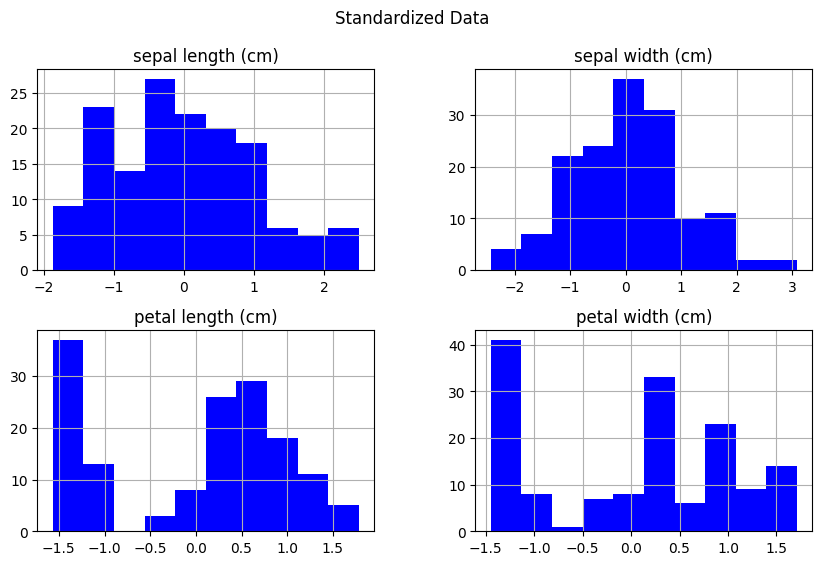

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalization
normalizer = MinMaxScaler()
normalized_data = pd.DataFrame(normalizer.fit_transform(df), columns=df.columns)

# Standardization
scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plot histograms
normalized_data.hist(bins=10, figsize=(10, 6), color='green')
plt.suptitle("Normalized Data")
plt.show()

standardized_data.hist(bins=10, figsize=(10, 6), color='blue')
plt.suptitle("Standardized Data")
plt.show()